In [1]:
!pip install numpy
!pip install pandas
!pip install lightgbm
!pip install xgboost
!pip install scikit-learn==0.22
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install plotly

ERROR: Exception:
Traceback (most recent call last):
  File "D:\Users\haozuo\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "D:\Users\haozuo\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "D:\Users\haozuo\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "D:\Users\haozuo\Anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "D:\Users\haozuo\Anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "D:\Users\haozuo\Anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "D:\Users\haozuo\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "D:\Users\haozuo\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buf

In [2]:
import os
import time
import numpy as np
import pandas as pd
import lightgbm as lgb
from multiprocessing import Pool
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
# plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from matplotlib.font_manager import FontProperties
# myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=15)
# sns.set(font=myfont.get_name())
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [3]:
data = pd.read_csv('../data/partial data-20191025.csv', encoding='utf8', usecols = ['n','q','p','te','P'])

In [4]:
len(data)

2704

In [5]:
# data = data.sample(frac=0.5, replace=True, random_state=46)

In [6]:
# len(data)

In [7]:
data.head()

,n,q,p,te,P
0,600,5.542,0.558,27.175,407.150
1,600,7.128,0.568,27.515,430.197
2,600,8.785,0.729,22.826,454.687
3,600,10.416,0.592,25.289,485.333
4,600,12.032,0.594,24.509,517.760


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       2704 non-null   int64  
 1   q       2704 non-null   float64
 2   p       2704 non-null   float64
 3   te      2704 non-null   float64
 4   P       2704 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 105.8 KB


In [9]:
data.describe()

,n,q,p,te,P
count,2704.000,2704.000,2704.000,2704.000,2704.000
mean,1124.596,12.796,4.819,27.995,1489.403
std,330.480,8.951,3.420,1.935,762.654
min,600.000,1.310,0.081,21.015,3.797
25%,857.000,5.687,2.039,26.546,913.996
50%,1071.000,10.322,4.103,27.994,1329.983
75%,1363.000,17.784,6.882,29.405,1911.268
max,1800.000,61.536,15.623,33.839,5106.914


In [10]:
data.drop(data[(data['P']<100)|(data['P']>4000)].index, inplace=True)

In [11]:
# def sqrt_fea(x):
#     return np.sqrt(x)

In [12]:
# def square_fea(x):
#     return np.square(x)

In [13]:
data.head()

,n,q,p,te,P
0,600,5.542,0.558,27.175,407.150
1,600,7.128,0.568,27.515,430.197
2,600,8.785,0.729,22.826,454.687
3,600,10.416,0.592,25.289,485.333
4,600,12.032,0.594,24.509,517.760


In [14]:
# data['te/n'] = data['n'] / data['te']

In [15]:
# data.head()

In [16]:
y = data['P']
X = data.drop('P', axis=1)

In [17]:
#划分数据集为训练集和测试集，按照7/3来划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3407)

In [18]:
# for i in X_train.columns.values:
#     X_train[i+'_sqrt'] = sqrt_fea(X_train[i])
#     X_train[i+'_square'] = square_fea(X_train[i])

In [19]:
# for i in X_test.columns.values:
#     X_test[i+'_sqrt'] = sqrt_fea(X_test[i])
#     X_test[i+'_square'] = square_fea(X_test[i])

In [20]:
title = ['p', 'n', 'q', 'te', 'P']


 mu = 1497.08 and sigma = 727.26



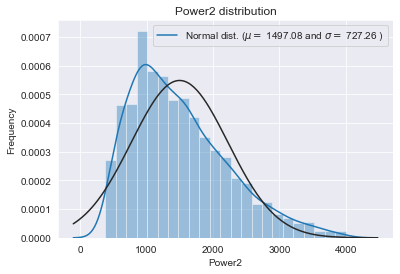

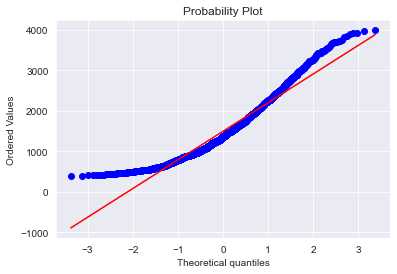

In [21]:
sns.distplot(y_train , fit=norm)
# 正态分布拟合
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 绘图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('Power2')
plt.ylabel('Frequency')
plt.title('Power2 distribution')

# 原始数据分布绘图
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()


 mu = 7.19 and sigma = 0.50



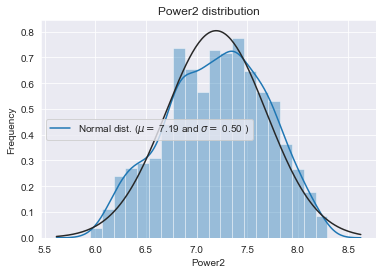

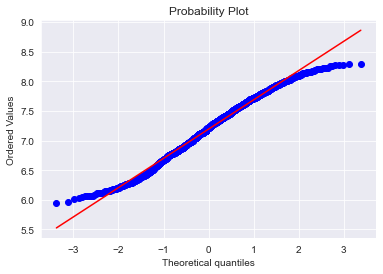

In [22]:
# 使用log1p函数完成log(1+x)变换
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# 查看调整后的分布
sns.distplot(y_train , fit=norm);

# 重新拟合
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# 重新绘制正态分布
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('Power2')
plt.ylabel('Frequency')
plt.title('Power2 distribution')

# 绘制变换后的分布
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [23]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
all_data = pd.concat((X_train, X_test)).reset_index(drop=True)
print("合并后数据集的size：",all_data.shape)

合并后数据集的size： (2684, 4)


In [24]:
all_data.head()

,n,q,p,te
0,600,5.450,5.832,26.227
1,1200,23.935,0.697,31.213
2,652,3.710,8.694,26.407
3,732,5.311,10.480,26.706
4,1428,7.400,1.724,27.857


In [25]:
all_data.isnull().sum()

n     0
q     0
p     0
te    0
dtype: int64

In [26]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [27]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor,AdaBoostClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb
import lightgbm as lgb

In [28]:
# 交叉验证函数
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    mae = -cross_val_score(model, train.values, y_train, scoring="neg_mean_absolute_error", cv=kf)
    return mae

def evalmape(dtrain, preds):
    gaps = dtrain
    err = abs(gaps-preds)/gaps
    err[(gaps==0)] = 0
    err = np.mean(err)*100
    return err

MAPE = make_scorer(evalmape, greater_is_better=False)

def mape_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    mape = -cross_val_score(model, train.values, y_train, scoring=MAPE, cv=kf)
    return mape

In [29]:
# KRR = KernelRidge(alpha=1, kernel='polynomial', degree=2, coef0=5)
KRR = KernelRidge(alpha=0.0001, kernel='rbf', gamma=0.001)
KRR = make_pipeline(RobustScaler(), KRR)

In [30]:
# SVR = SVR()
SVR_model = make_pipeline(RobustScaler(), SVR(kernel='rbf', C=10, epsilon=0.01))

In [31]:
RF = RandomForestRegressor(n_estimators=1500,min_samples_leaf=3, min_samples_split=5,random_state=2019)

In [32]:
# GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02,
#                                    max_depth=5, max_features='sqrt',
#                                    min_samples_leaf=20, min_samples_split=5, 
#                                    loss='huber', random_state = 2019)
# GBoost = GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='huber', learning_rate=0.02)

In [33]:
# model_xgb = xgb.XGBRegressor( learning_rate=0.02, max_depth=5,  n_estimators=1000, 
#                               gamma=0.1, subsample=0.9, min_child_weight=1, random_state =2015, silent=1)
model_xgb = xgb.XGBRegressor(n_estimators=1800, max_depth=5, min_child_weight=1, reg_lambda=0.1, reg_alpha=0.1,
                             subsample=0.8,colsample_bytree=0.8,learning_rate=0.05)

In [34]:
# model_lgb = lgb.LGBMRegressor(num_leaves=38, min_data_in_leaf=50, objective='regression', max_depth=-1,
#                               learning_rate=0.02, min_sum_hessian_in_leaf=6, boosting="gbdt",
#                               feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.7, bagging_seed=11,
#                               lambda_l1=0.1, verbosity=-1, nthread=4, random_state=2019)

In [35]:
MLP = MLPRegressor(hidden_layer_sizes=(100,50,50,50), #隐藏层的神经元个数
                    activation='tanh', 
                    solver='adam', 
                    alpha=0.01,   #L2惩罚参数
                    max_iter=5000, 
                    random_state=46, 
                    early_stopping=True, #是否提前停止训练
                    validation_fraction=0.2, #20%作为验证集
                    tol=1e-8)
MLP = make_pipeline(StandardScaler(), MLP)

In [36]:
start = time.time()
score = rmsle_cv(SVR_model)
score1 = mape_cv(SVR_model)
print("\nSVR 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nSVR 得分: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
end = time.time()
print("用时：{:.2f}s".format(end-start))


SVR 得分: 0.0438 (0.0020)


SVR 得分: 0.4511 (0.0151)

用时：6.82s


In [37]:
start = time.time()
score = rmsle_cv(RF)
score1 = mape_cv(RF)
print("RandomForest: 均值{:.4f} (标准差{:.4f})\n".format(score.mean(), score.std()))
print("RandomForest: 均值{:.4f} (标准差{:.4f})\n".format(score1.mean(), score1.std()))
end = time.time()
print("用时：{:.2f}s".format(end-start))

RandomForest: 均值0.0540 (标准差0.0016)

RandomForest: 均值0.5564 (标准差0.0216)

用时：53.97s


In [38]:
# start = time.time()
# score = rmsle_cv(GBoost)
# score1 = mape_cv(GBoost)
# print("GBoost 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# print("GBoost 得分: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
# end = time.time()
# print("用时：", end-start)

In [39]:
start = time.time()
score = rmsle_cv(model_xgb)
score1 = mape_cv(model_xgb)
print("Xgboost: 均值{:.4f} (标准差{:.4f})\n".format(score.mean(), score.std()))
print("Xgboost: 均值{:.4f} (标准差{:.4f})\n".format(score1.mean(), score1.std()))
end = time.time()
print("用时：{:.2f}s".format(end-start))

Xgboost: 均值0.0426 (标准差0.0008)

Xgboost: 均值0.4277 (标准差0.0136)

用时：23.20s


In [40]:
start = time.time()
score = rmsle_cv(MLP)
score1 = mape_cv(MLP)
print("MLP: 均值{:.4f} (标准差{:.4f})\n".format(score.mean(), score.std()))
print("MLP: 均值{:.4f} (标准差{:.4f})\n".format(score1.mean(), score1.std()))
end = time.time()
print("用时：", end-start)

MLP: 均值0.0663 (标准差0.0040)

MLP: 均值0.7083 (标准差0.0330)

用时： 43.03899621963501


### 计算rmse和mape的数值

In [41]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def mape(y, y_pred):
    gaps = y
    err = abs(gaps-y_pred)/gaps
    err[(gaps==0)] = 0
    err = np.mean(err)*100
    return err

In [42]:
#SVR:
SVR_model.fit(train, y_train)
SVR_train_pred = SVR_model.predict(train)
SVR_pred = SVR_model.predict(test)
print("SVR 训练集得分: {:.4f}".format(rmsle(np.expm1(y_train), np.expm1(SVR_train_pred))))
print("SVR 测试集得分: {:.4f}".format(rmsle(np.expm1(y_test), np.expm1(SVR_pred))))
print("SVR 训练集得分: {:.4f}".format(mape(np.expm1(y_train), np.expm1(SVR_train_pred))))
print("SVR 测试集得分: {:.4f}".format(mape(np.expm1(y_test), np.expm1(SVR_pred))))

SVR 训练集得分: 64.9014
SVR 测试集得分: 73.2289
SVR 训练集得分: 2.7093
SVR 测试集得分: 3.2831


In [43]:
#RandomForest:
RF.fit(train, y_train)
RF_train_pred = RF.predict(train)
RF_pred = RF.predict(test)
print("RF 训练集得分: {:.4f}".format(rmsle(np.expm1(y_train), np.expm1(RF_train_pred))))
print("RF 测试集得分: {:.4f}".format(rmsle(np.expm1(y_test), np.expm1(RF_pred))))
print("RF 训练集得分: {:.4f}".format(mape(np.expm1(y_train), np.expm1(RF_train_pred))))
print("RF 测试集得分: {:.4f}".format(mape(np.expm1(y_test), np.expm1(RF_pred))))

RF 训练集得分: 50.5087
RF 测试集得分: 82.8892
RF 训练集得分: 2.0350
RF 测试集得分: 3.5636


In [44]:
# #GBoost:
# GBoost.fit(train, y_train)
# GBoost_train_pred = GBoost.predict(train)
# GBoost_pred = GBoost.predict(test)
# print("GB 训练集得分: {:.4f}".format(rmsle(np.expm1(y_train), np.expm1(GBoost_train_pred))))
# print("GB 测试集得分: {:.4f}".format(rmsle(np.expm1(y_test), np.expm1(GBoost_pred))))
# print("GB 训练集得分: {:.4f}".format(mape(np.expm1(y_train), np.expm1(GBoost_train_pred))))
# print("GB 测试集得分: {:.4f}".format(mape(np.expm1(y_test), np.expm1(GBoost_pred))))

In [45]:
#XGBoost:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print("XGB 训练集得分: {:.4f}".format(rmsle(np.expm1(y_train), np.expm1(xgb_train_pred))))
print("XGB 测试集得分: {:.4f}".format(rmsle(np.expm1(y_test), np.expm1(xgb_pred))))
print("XGB 训练集得分: {:.4f}".format(mape(np.expm1(y_train), np.expm1(xgb_train_pred))))
print("XGB 测试集得分: {:.4f}".format(mape(np.expm1(y_test), np.expm1(xgb_pred))))

XGB 训练集得分: 19.5555
XGB 测试集得分: 65.2609
XGB 训练集得分: 0.8176
XGB 测试集得分: 2.9148


In [46]:
#MLP:
MLP.fit(train, y_train)
mlp_train_pred = MLP.predict(train)
mlp_pred = MLP.predict(test)
print("MLP 训练集得分: {:.4f}".format(rmsle(np.expm1(y_train), np.expm1(mlp_train_pred))))
print("MLP 测试集得分: {:.4f}".format(rmsle(np.expm1(y_test), np.expm1(mlp_pred))))
print("MLP 训练集得分: {:.4f}".format(mape(np.expm1(y_train), np.expm1(mlp_train_pred))))
print("MLP 测试集得分: {:.4f}".format(mape(np.expm1(y_test), np.expm1(mlp_pred))))

MLP 训练集得分: 80.2526
MLP 测试集得分: 75.6558
MLP 训练集得分: 3.5138
MLP 测试集得分: 3.6353


<Figure size 18432x9216 with 0 Axes>

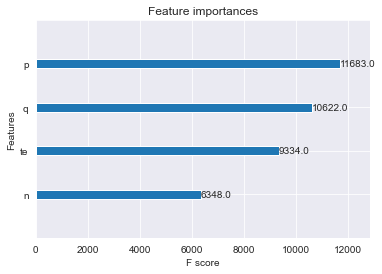

In [47]:
# xgboost特征重要性
plt.figure(figsize=(256,128))
xgb.plot_importance(model_xgb)
plt.title("Feature importances")
plt.show()

### R2在训练集和测试集上数值

In [49]:
print("SVR:", r2_score(np.expm1(y_train), np.expm1(SVR_train_pred)))
print("RF:", r2_score(np.expm1(y_train), np.expm1(RF_train_pred)))
# print("GBoost:", r2_score(np.expm1(y_train), np.expm1(GBoost_train_pred)))
print("XGBoost:", r2_score(np.expm1(y_train), np.expm1(xgb_train_pred)))
print("MLP:", r2_score(np.expm1(y_train), np.expm1(mlp_train_pred)))

SVR: 0.9920360009904283
RF: 0.9951765779194065
XGBoost: 0.9992769604761393
MLP: 0.9878229699798491


In [ ]:
print("SVR:", r2_score(np.expm1(y_test), np.expm1(SVR_pred)))
print("RF:", r2_score(np.expm1(y_test), np.expm1(RF_pred)))
# print("GBoost:", r2_score(np.expm1(y_test), np.expm1(GBoost_pred)))
print("XGBoost:", r2_score(np.expm1(y_test), np.expm1(xgb_pred)))
print("MLP:", r2_score(np.expm1(y_test), np.expm1(mlp_pred)))